# UK Covid Cases Analysis

### Installation of Pandas and Upload of the data file

In [679]:
!pip install pandas
!pip install numpy

#Importing the pandas and numpy libraries
import pandas as pd
import numpy as np

#Option to display all columns in a dataframe
pd.set_option("display.max_columns", None)

#Option to display all data in a dataframe without scientific format
pd.set_option('display.float_format', lambda x: '%.3f' % x)



## Assignment Activity 2: Import and explore the data
### - Printing the first and last 5 rows as well as the shape of the dataframe

In [682]:
# Extract the file containing UK Covid Cases data
uk_cases=pd.read_csv("/Users/shaunman/Documents/LSE/Course 2/Course 2 Final/LSE_DA201_Assignment_files/covid_19_uk_cases.csv")

# First Five Rows
print(uk_cases.head())

# Last five rows
print(uk_cases.tail())

# No of rows and columns within the dataframe 
print(uk_cases.shape)

uk_cases.describe()

  Province/State  Country/Region    Lat    Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom 18.221 -63.069                      AIA   
1       Anguilla  United Kingdom 18.221 -63.069                      AIA   
2       Anguilla  United Kingdom 18.221 -63.069                      AIA   
3       Anguilla  United Kingdom 18.221 -63.069                      AIA   
4       Anguilla  United Kingdom 18.221 -63.069                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0   0.000  0.000      0.000         0.000 

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000,7584.000,7584.000,7582.000,7582.000,7582.000,7582.000
mean,21.840,-41.440,12.500,6210.202,214708.152,454.691,685.229
std,28.306,30.528,14.010,24860.790,1007556.942,1010.642,819.257
min,-51.796,-81.255,0.000,0.000,0.000,0.000,0.000
25%,17.851,-64.668,0.000,0.000,12.000,0.000,105.000
50%,20.504,-60.855,2.500,1.000,168.500,13.000,390.000
75%,39.449,-5.152,29.000,25.000,1585.000,312.000,955.750
max,55.378,-2.364,29.000,138237.000,8317439.000,8322.000,4907.000


### Identifying and filtering out the missing values from the dataframe

In [683]:
# Number of missing values
print(uk_cases.isna().any(axis=1).sum())

# Printing the rows containing the missing values
missing_cases=uk_cases[uk_cases.isna().any(axis=1)]
print(missing_cases)

# Filtered out those rows containing NaN values
filter_cases=uk_cases.dropna()


2
    Province/State  Country/Region    Lat    Long ISO 3166-1 Alpha 3-Codes  \
875        Bermuda  United Kingdom 32.308 -64.751                      BMU   
876        Bermuda  United Kingdom 32.308 -64.751                      BMU   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
875  Northern America                         0  2020-09-21     NaN    NaN   
876  Northern America                         0  2020-09-22     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN  


### Filtering & Subsetting the data for Cases within Gibraltar

In [684]:
# Filtering results of Gibraltar from the data
gibr_cases = filter_cases[filter_cases['Province/State'] == 'Gibraltar']
gibr_cases

# Subsetting the Dataframe to display the following columns: Deaths, Cases, Recovered and Hospitalised
gb_sub=gibr_cases[['Date','Cases', 'Deaths', 'Recovered', 'Hospitalised']]
gb_sub.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Cases,Deaths,Recovered,Hospitalised
count,632.00000,632.00000,632.00000,632.00000
mean,2237.10918,40.20886,1512.82120,1027.62500
std,2136.26809,45.33283,1817.09675,1145.68106
min,0.00000,0.00000,0.00000,0.00000
25%,177.00000,0.00000,109.50000,157.75000
50%,1036.50000,5.00000,323.50000,675.50000
75%,4286.00000,94.00000,4122.50000,1548.00000
max,5727.00000,97.00000,4670.00000,4907.00000


## Assignment activity 3: Merge and analyse the data

### Importing the files containing UK Vaccination data

In [685]:
# Extract the file containing Vaccination Data
cov_vac=pd.read_csv("/Users/shaunman/Documents/LSE/Course 2/Course 2 Final/LSE_DA201_Assignment_files/covid_19_uk_vaccinated.csv")


### Merge list of UK Covid Cases and UK Vaccination Data

In [686]:
# Merge 2 dataframes with use of outerjoin.
uk_vac=pd.merge(uk_cases,cov_vac,how='outer')
print(uk_vac.shape)


(7584, 15)


### Missing Values filtered from Dataframe

In [687]:
# Number of missing values
print(uk_vac.isnull().sum())

# Filtered out those rows containing NaN values
ukvac_cases=uk_vac.dropna()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


### Identifying the columns within the DataFrame

In [688]:
# Comparing the output of Vaccinated column and Second Dose column
print(sum(ukvac_cases['Vaccinated']-ukvac_cases['Second Dose']))

#The output generated reveals that they are the same.
#Hence, invidivuals are considered Vaccinated if they have received 2nd dose and these columns can be substituted.

ukvac_cases.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7582 non-null   object 
 1   Country/Region            7582 non-null   object 
 2   Lat                       7582 non-null   float64
 3   Long                      7582 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7582 non-null   object 
 5   Sub-region Name           7582 non-null   object 
 6   Intermediate Region Code  7582 non-null   int64  
 7   Date                      7582 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
 12  Vaccinated                7582 non-null   int64  
 13  First Dose                7582 non-null   int64  
 14  Second

### Creating a new Dataframe containing the necessary columns for analysis

In [689]:
# Filtering out extra columns from the dataframe
ukvac=ukvac_cases[['Province/State','Date','Deaths','Recovered','First Dose','Second Dose']]


# Print shape of the new dataframe
print(ukvac.shape)

(7582, 6)


### Converting the data type from object to Date

In [690]:
# Import the datetime module and datetime class.
from datetime import datetime

# Current date and time .
now = datetime.now() 
print('Current time', now)

# Converting the data type of the Date Column from object to Date 
ukvac['Date']=pd.to_datetime(ukvac['Date'],format='%Y-%m-%d')
ukvac.info()


Current time 2022-07-11 12:39:59.637421
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7582 non-null   object        
 1   Date            7582 non-null   datetime64[ns]
 2   Deaths          7582 non-null   float64       
 3   Recovered       7582 non-null   float64       
 4   First Dose      7582 non-null   int64         
 5   Second Dose     7582 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 414.6+ KB


### Creating new columns necessary for analysis

In [691]:
# Creating a column containing those individual who have received only the first dose and not second dose
ukvac['dose1_nodose2']=ukvac['First Dose'] - ukvac['Second Dose']

# Creating a column containing the list of all vaccinations provided (both doses)
ukvac['total_dose']=ukvac['First Dose'] + ukvac['Second Dose']

# Creating a column containing the Month-wise date format
ukvac['month_year']=ukvac['Date'].dt.to_period('M')


### Creating New group from the data grouped by a specific variable 

In [692]:
# Group by Province/State
state_group=ukvac.groupby('Province/State')

# Group by First Dose Vaccinated 
firstdose_group=ukvac.groupby('First Dose')

# Group by Second Dose Vaccinated 
seconddose_group=ukvac.groupby('Second Dose')


### 3.4.a Province/State having the highest number of individuals with a first dose but not a second dose

In [693]:
# 3.4.a Province/State having the highest number of individuals with a first dose but not a second dose
prov=state_group.sum().sort_values('dose1_nodose2',ascending=False)
prov

,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose
Province/State,,,,,,
Gibraltar,25412.000,956103.000,5870786,5606041,264745,11476827
Montserrat,539.000,6376.000,5401128,5157560,243568,10558688
British Virgin Islands,3573.000,64359.000,5166303,4933315,232988,10099618
Anguilla,24.000,12708.000,4931470,4709072,222398,9640542
Isle of Man,15051.000,328319.000,4226984,4036345,190639,8263329
Falkland Islands (Malvinas),0.000,14754.000,3757307,3587869,169438,7345176
Cayman Islands,911.000,152052.000,3522476,3363624,158852,6886100
Channel Islands,37130.000,1027626.000,3287646,3139385,148261,6427031
Turks and Caicos Islands,5612.000,515923.000,3052822,2915136,137686,5967958


### 3.4.b Province/State having the highest percentage of individuals with a first dose but not a second dose.

In [694]:
#3.4.b Province/State having the highest percentage of individuals with a first dose but not a second dose.

prov['dose1_perc']=(prov['dose1_nodose2']*100)/prov['total_dose']
prov.sort_values('dose1_perc',ascending=False)


,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose,dose1_perc
Province/State,,,,,,,
Turks and Caicos Islands,5612.000,515923.000,3052822,2915136,137686,5967958,2.307
Isle of Man,15051.000,328319.000,4226984,4036345,190639,8263329,2.307
Anguilla,24.000,12708.000,4931470,4709072,222398,9640542,2.307
British Virgin Islands,3573.000,64359.000,5166303,4933315,232988,10099618,2.307
Cayman Islands,911.000,152052.000,3522476,3363624,158852,6886100,2.307
Channel Islands,37130.000,1027626.000,3287646,3139385,148261,6427031,2.307
Montserrat,539.000,6376.000,5401128,5157560,243568,10558688,2.307
Falkland Islands (Malvinas),0.000,14754.000,3757307,3587869,169438,7345176,2.307
Gibraltar,25412.000,956103.000,5870786,5606041,264745,11476827,2.307


### 3.4.c Change in number of vaccinations taken over time?

In [695]:
# Group by Date
timegroup=ukvac.groupby('month_year')

#3.4.c How has the number of vaccinated individuals and individuals \n
# received the first and second doses, changed over time?

vac_time=timegroup.sum()
vac_time


,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose
month_year,,,,,,
2020-01,0.000,0.000,0,0,0,0
2020-02,0.000,116.000,0,0,0,0
2020-03,12580.000,1929.000,0,0,0,0
2020-04,457216.000,14880.000,0,0,0,0
2020-05,1030749.000,32790.000,0,0,0,0
2020-06,1182674.000,38818.000,0,0,0,0
2020-07,1270661.000,43441.000,0,0,0,0
2020-08,1284798.000,46765.000,0,0,0,0
2020-09,1254487.000,61958.000,0,0,0,0


## Assignment Activity 4: Visualise and identify initial trends

### Identifying the columns within the Dataframe

In [696]:
ukvac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7582 non-null   object        
 1   Date            7582 non-null   datetime64[ns]
 2   Deaths          7582 non-null   float64       
 3   Recovered       7582 non-null   float64       
 4   First Dose      7582 non-null   int64         
 5   Second Dose     7582 non-null   int64         
 6   dose1_nodose2   7582 non-null   int64         
 7   total_dose      7582 non-null   int64         
 8   month_year      7582 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), object(1), period[M](1)
memory usage: 592.3+ KB


### Importing the necessary libraries for creating visualizations

In [697]:
#Importing the matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns


### 4.a: Visualise area wise comparison of individuals who received first dose and second dose vaccinations.

#### Creating dataframe containing area wise information of the dose type and number of doses provided.

In [698]:
# Objective: To visualise the number of individuals who have received a second 
# dose compared to individuals who have received their first dose in each area.

#Created a dataframe containing the necessary columns.
b1=prov[['First Dose','Second Dose']]

# Assigning Column Name to the Columns
b1.columns.name='Dose Type'

# Stacking the Dataframe to achieve new dataframe suitable for plotting
b2=b1.stack().reset_index()

# Renaming the column 0 which has been generated containing the Number of Doses provided.
b2.rename(columns={0:'Doses Provided'},inplace=True)
b2


,Province/State,Dose Type,Doses Provided
0,Gibraltar,First Dose,5870786
1,Gibraltar,Second Dose,5606041
2,Montserrat,First Dose,5401128
3,Montserrat,Second Dose,5157560
4,British Virgin Islands,First Dose,5166303
5,British Virgin Islands,Second Dose,4933315
6,Anguilla,First Dose,4931470
7,Anguilla,Second Dose,4709072
8,Isle of Man,First Dose,4226984
9,Isle of Man,Second Dose,4036345


### Creating a barplot to visualise the area wise comparison of vaccines provided.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gibraltar'),
  Text(1, 0, 'Montserrat'),
  Text(2, 0, 'British Virgin Islands'),
  Text(3, 0, 'Anguilla'),
  Text(4, 0, 'Isle of Man'),
  Text(5, 0, 'Falkland Islands (Malvinas)'),
  Text(6, 0, 'Cayman Islands'),
  Text(7, 0, 'Channel Islands'),
  Text(8, 0, 'Turks and Caicos Islands'),
  Text(9, 0, 'Bermuda'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Saint Helena, Ascension and Tristan da Cunha')])

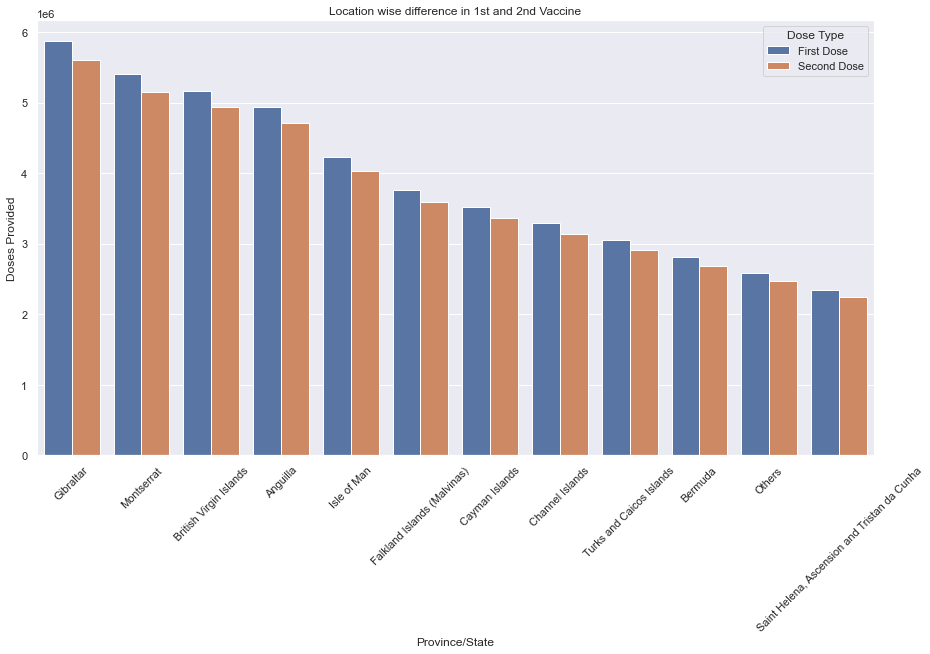

In [699]:
#Assign the size of the plot to be generated
sns.set(rc={'figure.figsize':(15, 8)})

#4.a-Creating a barplot visualizing area wise comparison of Vaccines provided
bar1=sns.barplot(x='Province/State',y='Doses Provided',hue='Dose Type',data=bar2)

#Assigning Title to the barplot
bar1.set_title("Location wise difference in 1st and 2nd Vaccine")

# Assigning rotation to the x axis labels to provide clear view of labels.
plt.xticks(rotation=45)

#### Saving the graph generated into a png file

In [700]:
#Save figure as PNG
fig = bar1.get_figure()
fig.savefig('/Users/shaunman/Desktop/Location_based_Vaccine_Dosage.png')

### 4.b: Visualise the monthly deaths per region.

#### Create a dataframe containing the necessary columns for the visualisation

In [701]:
#4.b Objective:Create a visualisation that communicates the number of deaths per month in each region.

#Group by Date and Province/State
death_df=ukvac[['Province/State','Deaths','month_year']]
prov_date=death_df.groupby(['month_year','Province/State']).sum().reset_index()
prov_date

,month_year,Province/State,Deaths
0,2020-01,Anguilla,0.000
1,2020-01,Bermuda,0.000
2,2020-01,British Virgin Islands,0.000
3,2020-01,Cayman Islands,0.000
4,2020-01,Channel Islands,0.000
...,...,...,...
259,2021-10,Isle of Man,744.000
260,2021-10,Montserrat,14.000
261,2021-10,Others,1924499.000
262,2021-10,"Saint Helena, Ascension and Tristan da Cunha",0.000


### Pivoting the table to reformat the table to a more readable format

In [702]:
#Pivot the table to create a more readable format of the deaths across all regions
lineplot_a=prov_date.pivot_table(index='month_year', columns='Province/State', values='Deaths').reset_index()
lineplot_a

Province/State,month_year,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Others,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands
0,2020-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2020-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2020-03,0.000,0.000,0.000,16.000,10.000,0.000,0.000,0.000,0.000,12550.000,4.000,0.000
3,2020-04,0.000,117.000,12.000,30.000,554.000,0.000,0.000,228.000,7.000,456242.000,0.000,26.000
4,2020-05,0.000,255.000,31.000,31.000,1332.000,0.000,0.000,727.000,31.000,1028311.000,0.000,31.000
5,2020-06,0.000,270.000,30.000,30.000,1414.000,0.000,0.000,720.000,30.000,1180149.000,0.000,31.000
6,2020-07,0.000,279.000,31.000,31.000,1457.000,0.000,0.000,744.000,31.000,1268026.000,0.000,62.000
7,2020-08,0.000,279.000,31.000,31.000,1470.000,0.000,0.000,744.000,31.000,1282143.000,0.000,69.000
8,2020-09,0.000,252.000,30.000,30.000,1440.000,0.000,0.000,720.000,30.000,1251835.000,0.000,150.000
9,2020-10,0.000,279.000,31.000,31.000,1488.000,0.000,0.000,744.000,31.000,1355504.000,0.000,186.000


##### Noted that the data for 'Others' is region is extremely large in comparison to other regions
##### Hence, this data can be excluded in order to not skew the visualization of the other data

### Viewing all the columns within the Dataframe

In [441]:
# View the column names.
print(lineplot_a.columns)

Index(['month_year', 'Anguilla', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)',
       'Gibraltar', 'Isle of Man', 'Montserrat', 'Others',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Turks and Caicos Islands'],
      dtype='object', name='Province/State')


### Creation of the lineplot visualising monthly deaths across regions

Text(0, 0.5, 'Deaths')

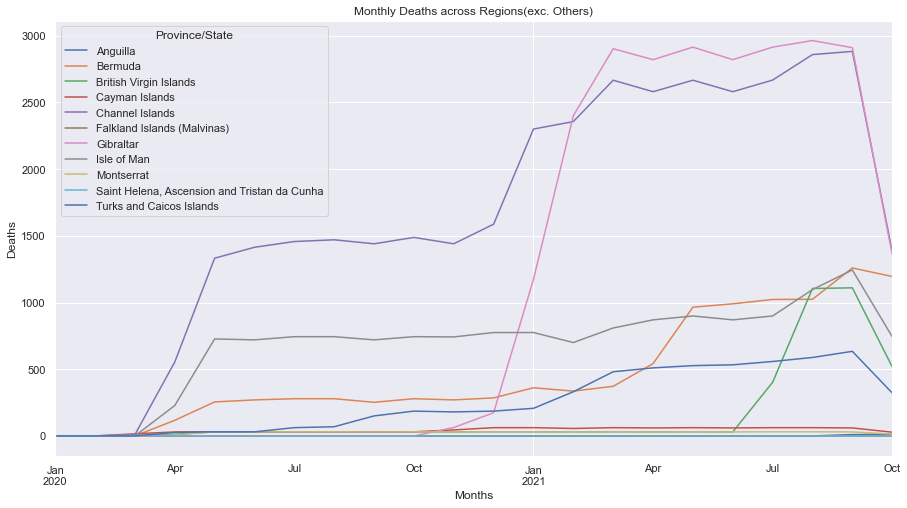

In [703]:
# As the data for others is too large, we can remove it for our comparison

#Setting the size of the lineplot
sns.set(rc={'figure.figsize':(15, 8)})

# 4.b: Creation of lineplot displaying the monthly deaths in across all regions except others
line1=lineplot_a.plot(x='month_year',y=['Anguilla','Bermuda','British Virgin Islands', 'Cayman Islands',
                                     'Channel Islands','Falkland Islands (Malvinas)','Gibraltar',\
                                     'Isle of Man','Montserrat',\
                                  'Saint Helena, Ascension and Tristan da Cunha','Turks and Caicos Islands'])

#Assigning title and labels to the barplot
line1.set_title("Monthly Deaths across Regions(exc. Others)")
line1.set_xlabel("Months")
line1.set_ylabel("Deaths")

#### Saving the graph generated into a png file

In [401]:
#Save figure as PNG
fig = line1.get_figure()
fig.savefig('/Users/shaunman/Desktop/Monthly Deaths displaying across regions.png')

### 4.c: Visualisation communicating region wise recovery numbers

#### Creating a dataframe containing the necessary columns for creating the visualisation

In [396]:
#4.c Objective:Create a visualisation that communicates which region has the greatest number of recoveries. 

#Group by Date and Province/State
rec_a=ukvac[['Province/State','Recovered','month_year']]
rec_b=rec_a.groupby(['month_year','Province/State']).sum().reset_index()
rec_b

,month_year,Province/State,Recovered
0,2020-01,Anguilla,0.0
1,2020-01,Bermuda,0.0
2,2020-01,British Virgin Islands,0.0
3,2020-01,Cayman Islands,0.0
4,2020-01,Channel Islands,0.0
...,...,...,...
259,2021-10,Isle of Man,0.0
260,2021-10,Montserrat,0.0
261,2021-10,Others,0.0
262,2021-10,"Saint Helena, Ascension and Tristan da Cunha",0.0


### Pivoting the table to reformat the table to a more readable format

In [397]:
#Pivot the table to create a more readable format of the deaths across all regions
lineplot_b=rec_b.pivot_table(index='month_year', columns='Province/State', values='Recovered').reset_index()
lineplot_b

Province/State,month_year,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Others,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands
0,2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0
2,2020-03,0.0,20.0,0.0,0.0,0.0,0.0,153.0,0.0,0.0,1752.0,4.0,0.0
3,2020-04,26.0,908.0,51.0,174.0,4129.0,113.0,2833.0,4328.0,31.0,2247.0,0.0,40.0
4,2020-05,93.0,2240.0,155.0,1497.0,14511.0,403.0,4430.0,8927.0,263.0,0.0,0.0,271.0
5,2020-06,90.0,3773.0,210.0,3895.0,15392.0,390.0,5080.0,9358.0,300.0,0.0,0.0,330.0
6,2020-07,93.0,4273.0,217.0,6162.0,16180.0,403.0,5531.0,9672.0,310.0,0.0,0.0,600.0
7,2020-08,93.0,4557.0,231.0,6262.0,16787.0,403.0,6088.0,9672.0,358.0,0.0,0.0,2314.0
8,2020-09,90.0,4548.0,1059.0,6144.0,17345.0,390.0,9022.0,9375.0,356.0,0.0,44.0,13585.0
9,2020-10,93.0,5342.0,2147.0,6604.0,20017.0,403.0,14054.0,9882.0,372.0,0.0,62.0,20940.0


### Viewing all the columns within the Dataframe

In [712]:
# View the column names.
print(lineplot_b.columns)

Index(['month_year', 'Anguilla', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)',
       'Gibraltar', 'Isle of Man', 'Montserrat', 'Others',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Turks and Caicos Islands'],
      dtype='object', name='Province/State')


### Creation of the lineplot visualising monthly recoveries across regions

Text(0, 0.5, 'Deaths')

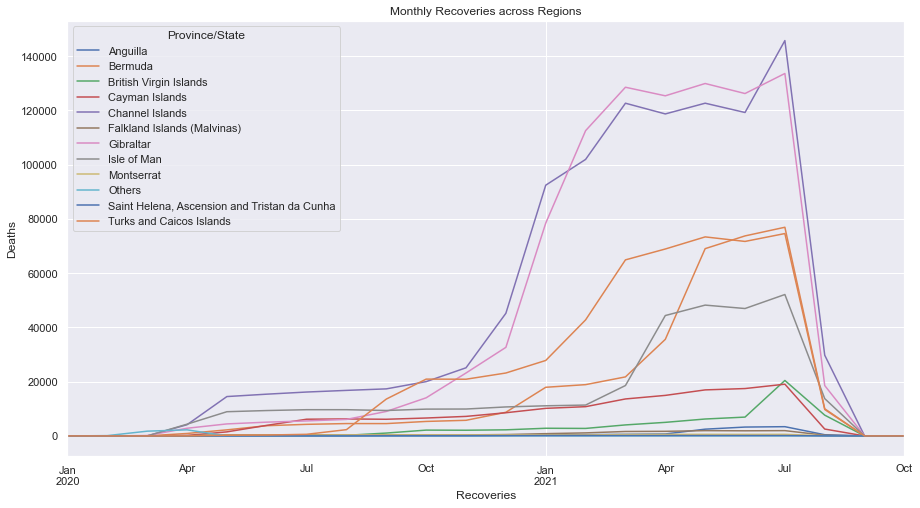

In [713]:
#Unlike before, the value of 'Others' region is included as the number is within an acceptable range
#Setting the size of the lineplot
sns.set(rc={'figure.figsize':(15, 8)})

# 4.c: Creation of lineplot displaying the monthly recoveries in across all regions except others
line2=lineplot_b.plot(x='month_year',y=['Anguilla','Bermuda','British Virgin Islands', 'Cayman Islands',
                                     'Channel Islands','Falkland Islands (Malvinas)','Gibraltar',\
                                     'Isle of Man','Montserrat','Others',\
                                  'Saint Helena, Ascension and Tristan da Cunha','Turks and Caicos Islands'])

#Assigning title and labels to the barplot
line2.set_title("Monthly Recoveries across Regions")
line2.set_xlabel("Recoveries")
line2.set_ylabel("Deaths")

#### Saving the graph generated into a png file

In [714]:
#Save figure as PNG
fig = line2.get_figure()
fig.savefig('/Users/shaunman/Desktop/Monthly Recoveries across all regions.png')

## Assignment Activity 5:Analyse the Twitter data

#### Importing the Beautiful Soup library

In [715]:
#Import the BeautifulSoup library
from bs4 import BeautifulSoup

### Creating a dataframe from CSV File containing Tweets Data.

### Viewing the shape, head() and Data Types of the dataframe

In [716]:
#Read the tweets.csv file and create a new DataFrame.
twitter_raw= pd.read_csv('/Users/shaunman/Documents/LSE/Course 2/Course 2 Final/LSE_DA201_Assignment_files/tweets.csv')

#Print shape of the Dataframe generated
print(twitter.shape)

#Print the DataFrame to determine the head() and data types. 
twitter_raw.info()

#Print the first 5 rows of the dataframe
twitter_raw.head()

(3959,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1528750000000000000.000,1528750000000000000.000,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1528720000000000000.000,1528720000000000000.000,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1528650000000000000.000,1528650000000000000.000,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1528610000000000000.000,1528610000000000000.000,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1528600000000000000.000,1528600000000000000.000,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN


### Assigning text column to new series

In [721]:
# Creating a new series containing the 'text' Column from the inital dataframe.
twitter1=twitter_raw['text']

### Identifying and filtering Null Values within the series

In [724]:
# Print the number of null values within the Series
print(twitter1.isna().sum())

1


In [725]:
# Drop the null value from the Series
twitter1=twitter1.dropna()

In [727]:
# Print the null value count and shape after removing the null containing null value
print(twitter1.isna().sum())
print(twitter1.shape)

0
(3959,)


### Convert the values to string format and create a list containg all the # tags

In [736]:
# Convert all values in the text column to string format
twitter1=twitter1.astype(str)


In [737]:
#Create a list containing all # values
tags=[]
for y in [x.split(' ') for x in twitter1.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
            
# Creating a series containing the # values
tags=pd.Series(tags).value_counts()

### 5.2.a: Print the 30 records in the tags series

In [732]:
# 5.2.a: Print the 30 records in the tags series
print(tags[0:30])

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64


### Resetting the index and assigning the data to a new dataframe

In [733]:
# 5.2.b 
#Reset index to new dataframe with content columns separate
hash_tags=tags.reset_index()

In [734]:
#Assigning Column names to the new dataframe
hash_tags.columns=['HashTag','Count']
print(hash_tags)
hash_tags['Count']=hash_tags['Count'].astype(int)



                         HashTag  Count
0                       #COVID19   1632
1                #CovidIsNotOver    472
2                         #China    262
3                       #covid19    176
4                       #Covid19    148
...                          ...    ...
4771  hospital.\n#CovidIsNotOver      1
4772           #OmicronIsNotMild      1
4773                 #Covid19NSW      1
4774                   #CovidNSW      1
4775      total.\n\n#coronavirus      1

[4776 rows x 2 columns]


### View the top 10 # tags 

In [735]:
# Based on the output, we can limit the searches to the top 10 trending hash tags
# Assigned the hash_tags to temp dataframe for purpose of visualisation
temp_tags=hash_tags[0:10]
print(temp_tags)

            HashTag  Count
0          #COVID19   1632
1   #CovidIsNotOver    472
2            #China    262
3          #covid19    176
4          #Covid19    148
5            #COVID    108
6            #covid    104
7           #Greece    103
8      #coronavirus    100
9  #PeoplesVaccine.     84


### 5.2.b Visualisation showing the top trending hashtags on twitter

Text(0.5, 1.0, 'Top 10 Trending Hashtags of Twitter')

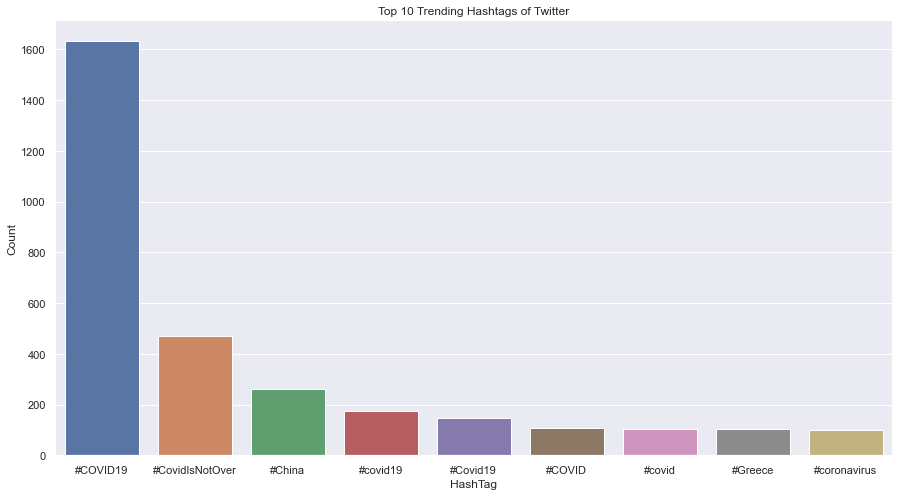

In [575]:
# Create a visualisation showing the top trending hashtags on twitter
trending=sns.barplot(x='HashTag',y='Count',data=temp_tags)

#Set title for the barplot
trending.set_title('Top 10 Trending Hashtags of Twitter')

#### Saving the graph generated into a png file

In [677]:
#Save figure as PNG
fig = trending.get_figure()
fig.savefig('/Users/shaunman/Desktop/Top 10 trending Hashtags of Twitter.png')

### Creating a new dataframe with the text values

In [588]:
# Copying the 'text' value of tweet to identify covid related tweets
data=pd.DataFrame(twitter.values)
data.columns=['Tweets']
print(data)

                                                 Tweets
0     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1     #COVID19 is linked to more #diabetes diagnoses...
2     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3     READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4     Advanced healthcare at your fingertips\nhttps:...
...                                                 ...
3954  NORTHERN IRELAND.  Announced on THURSDAY.\n\nC...
3955  NORTHERN IRELAND.  Announced on WEDNESDAY.\n\n...
3956  NORTHERN IRELAND.  Announced on TUESDAY.\n\nCO...
3957  NORTHERN IRELAND.  Announced on MONDAY.\n\nCOV...
3958  NORTHERN IRELAND.    \n\nNI #COVID19 data has ...

[3959 rows x 1 columns]


### Identifying data relating to Covid19 and appending into a single unique column

In [774]:
# Creating subsets containing the words tweets relating to covid
subset=data[data['Tweets'].str.contains('Covid')]
subset2=data[data['Tweets'].str.contains('covid')]
subset3=data[data['Tweets'].str.contains('corona')]
subset4=data[data['Tweets'].str.contains('COVID')]

# Appending the subsets to one subset
subset3=subset3.append(subset4)
subset2=subset2.append(subset3)
subset=subset.append(subset2)

# View the number of duplicate values within the Series
print(subset.nunique())

# Dropping the duplicate tweets created during appending
subset=subset.drop_duplicates(subset='Tweets')
subset

Tweets    3154
dtype: int64


,Tweets
7,Out of the hospital from DKA.. now I tested po...
57,#IDFPodcast - Join host @not_defeated as she w...
60,"“It took a while to convince me,” said Al-Aly,..."
61,Decoding the #COVID19 connection with diabetes...
68,#IDFPodcast - Join host @not_defeated as she w...
...,...
3942,Missed it? FDA rebukes Pfizer CEO's suggestion...
3943,"If you need to go out in public, maintain two ..."
3944,"#Davos2022 | @hereenBhan talks to GV Prasad, C..."
3945,"Every 30 hours during the pandemic, a new bill..."


### Printing the tweets relating to Covid19

In [752]:
# Printing the Tweet Number and the subsequent tweet containing COVID relating tweets.
for i in subset.index:
    print('Tweet',i)
    print(subset.loc[i,"Tweets"],'\n')

Tweet 7
Out of the hospital from DKA.. now I tested positive for Covid… why me #T1D #Diabetes #COVID19 

Tweet 57
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/04dXFAI1uj https://t.co/0sa99c4SAw 

Tweet 60
“It took a while to convince me,” said Al-Aly, who directs the clinical epidemiology center at the Veterans Affairs St. Louis Health Care System in Missouri. “It was hard to believe that Covid could be doing this.”

#LongCovid #Diabetes 
 https://t.co/aZ5QOr5ao0 

Tweet 61
Decoding the #COVID19 connection with diabetes #LongCovid 

https://t.co/pVDlI4RjgU 

Tweet 68
#IDFPodcast - Join host @not_defeated as she welcomes Drs. @gillianlbooth &amp; @pandoralucrezia for an in-depth discussion on the connections between #Covid19 and #diabetes. Listen on Spotify: https://t.co/7s89RuR27M https://t.co/wQMWvlSCKl 

Tweet 78
We are livi

Tweet 1140
#NYC 7-day #COVID19 average is 4,213. #CovidIsNotOver #pandemic 

Tweet 1141
How good is Australia?!? #ScottytheFailure #auspol  #COVID19 #CovidIsNotOver 
https://t.co/xclV7Uhs1v 

Tweet 1142
#CovidisNOTOver: RAPID Increase of #Covid Infections &amp; Covid-Related Hospitalization in #USA #LongCovidAwareness #Covid19 #LongCovidKids #LongCovid #Progressive #FBLC #FBLC #BTRTG #Covid19Canada #Coronavirus #Covid_19 #Covid19BC #Covid19AB #IARTG #Retweet https://t.co/3BFwnUCkk9 

Tweet 1143
SERIOUSLY PEOPLE!!! DO NOT COUGH AND SNEEZE AND SPLUTTER ON PUBLIC TRANSPORT WITHOUT COVERING YOUR MOUTH/NOSE. YOU SHOULD ALSO BE WEARING A MASK!! WHERE HAVE YOU BEEN THE LAST TWO YEARS? #CovidIsNotOver #COVID19 #COVID19Vic 

Tweet 1144
Over 14,000 new cases in Victoria yesterday and still more than half the people on my train this morning are not wearing a mask. #COVID19 #CovidIsNotOver 

Tweet 1145
If we won’t impose mandatory precautionary measures against #COVID19 because “people won’t compl

Improperly discarded surgical #masks threaten the marine #ecosystem and food chain #Pandemic #Plastic #Pollution #Coronavirus #Covid #Covid19 #SaveOurSeas #PickItUp ⁦@10DowningStreet⁩ ⁦@UKParliament⁩ ⁦@BorisJohnson⁩ ⁦@ZacGoldsmith⁩  https://t.co/K4woWcTYs7 

Tweet 3199
IN 2020 THEY DID THIS:
When doctors and the #NHS are legally allowed to falsify all death certificate's and get away with it - we are all being LIED to.

#coronavirus #Covid19 #BorisJohnson https://t.co/1QHUVELMBM 

Tweet 3203
Prime Minister #Boris Johnson has earned his place as a global leader. He has led us out of #Covid19 he's led a global response to help #Ukraine fight for their democracy. I am proud to support @BorisJohnson 
#BackBoris https://t.co/bxBDafvVsw 

Tweet 3217
British police said on Thursday they had ended their investigation into #Covid19 lockdown parties held at Prime Minister #BorisJohnson's #DowningStreet office, saying they had issued a total of 126 fines. https://t.co/qRMtD3Ob9Q 

Tweet 3231
Met 

COVID 19 to complicate Gestational diabetes mellitus:CRONOS Study #COVID19 #Gestational #diabetes #gestationaldiabetes #mellitusdiagnosis #bodymassindex #BMI #insulin #insulintreatment #CRONOSStudy https://t.co/EcTt3PomaU 

Tweet 27
READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent
Evidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputations from blood clots, onset diabetes,&amp; erectile dysfunction.
https://t.co/shBvjpzR9U 10 https://t.co/hHqjbORab4 

Tweet 30
Some tips to keep in mind on how to prevent #diabetes
https://t.co/xbqhLy5WEL
#SaturdayMorning #endocrinology #diabetes #metabolism #thyroid #adrenalinefatigue #Mentalhealth #COVID19 #osteoporosis #obesity #sepsis #hormones #naturaltherapies #clinicaltrials https://t.co/PxXt6QTj9M 

Tweet 31
READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent
Evidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs,

https://t.co/1YgSWVmeEv https://t.co/YYf0KwcekB 

Tweet 1773
Due to the severe shortage of #contrast media (#iohexol) widely used for #CT scanning, affected #radiology departments will need to institute emergency changes in #imaging protocols and patient #triage. The spike in #COVID19 cases in #Shanghai, #China 🇨?…https://t.co/3ZmMmCFkBS 

Tweet 1775
More than 217 million Chinese aged 60 or above, or 82.3% of #China's senior citizens, have been fully vaccinated against #COVID19. Among them, nearly 167 million have received a booster shot, Lei Zhenglong, an official with the National Health Commission, said Monday. https://t.co/FVwgMPn8Zj 

Tweet 1776
Daily New Cases • New Deaths • Total Deaths To Date thousand K • Population million M
Europe  48483 • 149 • 1836K • 740M
S.Korea  19298 • 54 • 23K • 51M
China  169 • 3 • 5K • 1400M
USA  19972 • 22 • 1028K • 330M
#COVID19 5/23/22
Source: https://t.co/1eFeH7cRvB 

Tweet 1778
COVID19 RESTRICTION: China Relaxes Seafarer Repatriation Overseas h

It’s my sister getting 3 full meals/day served to her room (in my house) while she’s “sick” with COVID but she’s feeling just fine now for me. It’s her talking about some “tank you, tank you” for me. This girl is pure comedy 😂 

Tweet 3442
COVID Vax Injuries &amp; Deaths Continue To Climb. https://t.co/GJXRD5oYoe @timomalum #blogengage https://t.co/dZMYFCjZCh 

Tweet 3443
Wake County starts administering COVID-19 booster shots for children ages 5-11 :: https://t.co/P5Tv621iyG https://t.co/OUjWhSGEBI 

Tweet 3446
New London County's COVID cases up 24%; Connecticut cases surge 36.6% https://t.co/FUfukXghxh 

Tweet 3447
Three doses of COVID-19 vaccine elicit good response in children under five: Pfizer-BioNTech https://t.co/4t6b1ULzN4 

Tweet 3448
Pfizer says 3 COVID shots protect children under 5: Children's COVID vaccine -photo courtesy Pfizer 

By LAURAN NEERGAARD, AP Medical Writer

Three doses of Pfizer’s COVID-19 vaccine offer strong protection for children younger than 5, the compa

## Identifying Tweets containg both #coronavirus and #vaccinated hashtags

### Print the series containing #coronavirus and #vaccinated and view the shape of the Series

In [770]:
# Creating subsets containing the tweets #coronavirus and #vaccinated
subsetA=data[data['Tweets'].str.contains('#coronavirus')].astype(str)
subsetB=data[data['Tweets'].str.contains('#vaccinated')].astype(str)
print(subsetA.shape)
print(subsetB.shape)

(217, 1)
(9, 1)


#### Noted the #coronavirus subset series contains 217 rows while #vaccinated series contains 9 rows

### Apend both subsets into a single subset

In [773]:
# Appending the subsets to one subset
subsetC=subsetA.append(subsetB).astype(str)

# View the shape of the appended subset
print(subsetC.shape)

(226, 1)


#### Noted there are a total of 226 rows in the new series

### Identify the number of duplicates which are tweets containing both #coronavirus and #vaccinated

In [772]:
# Print the number of unique rows within the Series
print(subsetC.nunique())

Tweets    226
dtype: int64


#### Noted all 226 rows are unique

### Hence, there are no tweets containing both #coronavirus and #vaccinated